In [ ]:
import zipfile
import os
zppath="/content/drive/MyDrive/data1a.zip"

with zipfile.ZipFile(zppath,'r') as zpfile:
    
    zpfile.extractall()

In [ ]:
# import shutil
# shutil.rmtree("/content/data1a")

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
base_dir = '/content/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [52]:
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [53]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Model 
from tensorflow.keras.applications import resnet50   

base_model = Resnet50.imageReader(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/30
92/92 - 76s - loss: 2.0628 - Accuracy: 0.7076 - precision: 0.7211 - recall: 0.6772 - val_loss: 641.2014 - val_Accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 76s/epoch - 828ms/step
Epoch 2/30
92/92 - 17s - loss: 0.6571 - Accuracy: 0.7652 - precision: 0.7711 - recall: 0.7543 - val_loss: 6.0947 - val_Accuracy: 0.5391 - val_precision: 0.5205 - val_recall: 0.9957 - 17s/epoch - 187ms/step
Epoch 3/30
92/92 - 17s - loss: 0.4500 - Accuracy: 0.8196 - precision: 0.8326 - recall: 0.8000 - val_loss: 19.4704 - val_Accuracy: 0.5152 - val_precision: 0.5077 - val_recall: 1.0000 - 17s/epoch - 184ms/step
Epoch 4/30
92/92 - 17s - loss: 0.3957 - Accuracy: 0.8370 - precision: 0.8429 - recall: 0.8283 - val_loss: 1.3669 - val_Accuracy: 0.6630 - val_precision: 0.6000 - val_recall: 0.9783 - 17s/epoch - 182ms/step
Epoch 5/30
92/92 - 20s - loss: 0.3380 - Accuracy: 0.8630 - precision: 0.8670 - recall: 0.8576 - val_loss: 3.3941 - val_Accuracy: 0.7978 - val_precision: 0.8743 - val

In [55]:
model.save("classifier.h5")

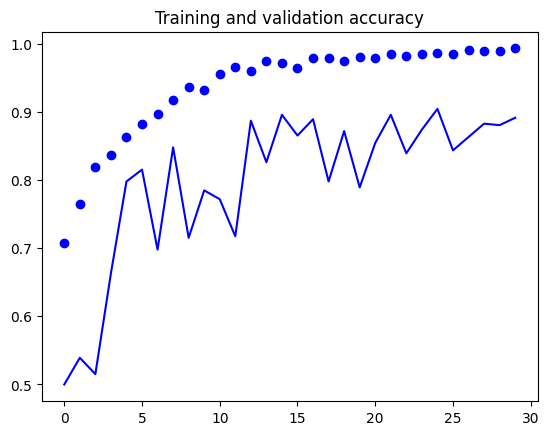

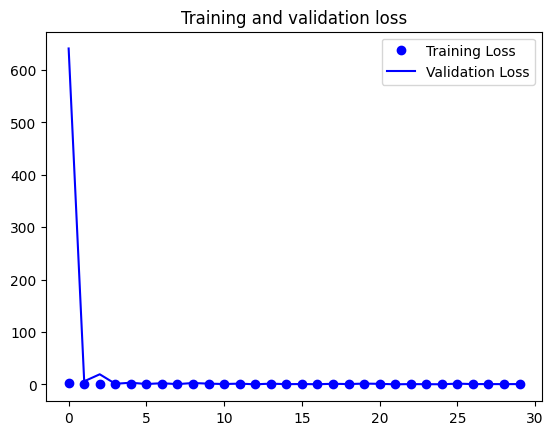

In [56]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 31ms/step
[[1.]]
The car is damaged


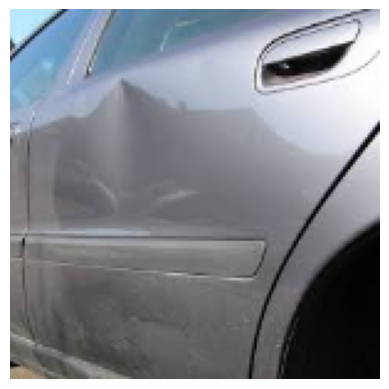

In [57]:
im = cv2.imread("/content/data1a/training/00-damage/0003.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)